In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

def get_similar(pos_pscore: np.ndarray, neg_pscore: np.ndarray, topn: int=5, n_jobs: int=1):
    from sklearn.neighbors import NearestNeighbors

    knn = NearestNeighbors(n_neighbors=topn + 1, metric='euclidean', n_jobs=n_jobs)
    knn.fit(neg_pscore.reshape(-1, 1))

    distances, indices = knn.kneighbors(pos_pscore.reshape(-1, 1))
    sim_distances = distances[:, 1:]
    sim_indices = indices[:, 1:]
    return sim_distances, sim_indices


def get_matching_pairs(treated_df, non_treated_df, scaler=True):

    treated_x = treated_df.values
    non_treated_x = non_treated_df.values
    if scaler == True:
        scaler = StandardScaler()
    if scaler:
        scaler.fit(treated_x)
        treated_x = scaler.transform(treated_x)
        non_treated_x = scaler.transform(non_treated_x)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(non_treated_x)
    distances, indices = nbrs.kneighbors(treated_x)
    print(indices)
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.loc[indices]
    return matched

[[545]
 [325]
 [422]
 [881]
 [ 10]
 [590]
 [973]
 [901]
 [536]
 [333]
 [  1]
 [464]
 [960]
 [422]
 [430]
 [300]
 [147]
 [543]
 [771]
 [278]
 [902]
 [ 76]
 [751]
 [215]
 [924]
 [468]
 [875]
 [925]
 [225]
 [982]
 [604]
 [531]
 [ 34]
 [902]
 [531]
 [225]
 [182]
 [602]
 [361]
 [ 76]
 [582]
 [761]
 [205]
 [361]
 [151]
 [809]
 [584]
 [953]
 [740]
 [ 25]
 [982]
 [531]
 [169]
 [204]
 [737]
 [488]
 [579]
 [780]
 [673]
 [215]
 [847]
 [ 20]
 [208]
 [582]
 [ 93]
 [731]
 [783]
 [936]
 [200]
 [617]
 [705]
 [ 49]
 [731]
 [ 76]
 [858]
 [643]
 [397]
 [919]
 [582]
 [751]
 [494]
 [170]
 [584]
 [208]
 [371]
 [854]
 [531]
 [113]
 [ 78]
 [920]
 [515]
 [582]
 [581]
 [422]
 [459]
 [170]
 [809]
 [999]
 [222]
 [288]
 [217]
 [378]
 [269]
 [858]
 [755]
 [740]
 [828]
 [422]
 [147]
 [582]
 [122]
 [ 93]
 [698]
 [901]
 [497]
 [ 66]
 [147]
 [188]
 [357]
 [ 25]
 [371]
 [384]
 [783]
 [241]
 [613]
 [398]
 [861]
 [360]
 [236]
 [208]
 [466]
 [316]
 [437]
 [301]
 [751]
 [910]
 [803]
 [420]
 [390]
 [233]
 [875]
 [592]
 [459]

(-1.0, 2.0)

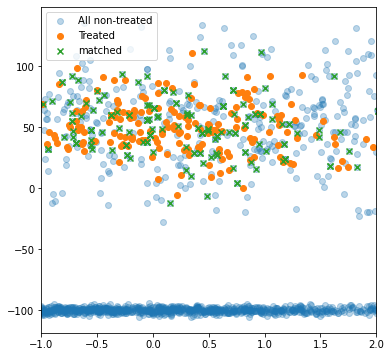

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

treated_df = pd.DataFrame()
np.random.seed(1)

size_1 = 200
size_2 = 1000
treated_df['x'] = np.random.normal(0,1,size=size_1)
treated_df['y'] = np.random.normal(50,20,size=size_1)
treated_df['z'] = np.random.normal(0,100,size=size_1)

non_treated_df = pd.DataFrame()
# two different populations
non_treated_df['x'] = list(np.random.normal(0,3,size=size_2)) + list(np.random.normal(-1,2,size=2*size_2))
non_treated_df['y'] = list(np.random.normal(50,30,size=size_2)) + list(np.random.normal(-100,2,size=2*size_2))
non_treated_df['z'] = list(np.random.normal(0,200,size=size_2)) + list(np.random.normal(13,200,size=2*size_2))


matched_df = get_matching_pairs(treated_df, non_treated_df)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(non_treated_df['x'], non_treated_df['y'], alpha=0.3, label='All non-treated')
plt.scatter(treated_df['x'], treated_df['y'], label='Treated')
plt.scatter(matched_df['x'], matched_df['y'], marker='x', label='matched')
plt.legend()
plt.xlim(-1,2)

In [12]:
matched_df

,x,y,z
545,1.674793,46.041296,-118.359940
325,-0.483595,72.540630,28.002466
422,-0.690342,36.767922,15.245521
881,-1.288787,92.909456,97.120577
10,1.011663,30.114565,-13.390071
...,...,...,...
122,-1.511922,68.689434,145.439014
803,0.753929,4.485462,57.724307
208,0.627290,67.037918,92.325104
828,0.821481,51.900325,-41.406381
